In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/content/drive/MyDrive/floatRanges.xlsx")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.head()

,teaching,foreign language,study of history,arts skills,journalism,economic&stat,philosophy&psychology,Athletic&training,accounting&BIS,political&scienes,law&canon,target
0,2.687521,6.465513,5.203674,1.301182,5.093832,7.412770,1.033587,1.007595,2.265348,7.938241,1.158473,سياسة و اقتصاد
1,1.586377,4.019838,4.921949,0.798779,6.650666,7.718297,0.183532,1.917484,2.401719,7.257602,0.374319,سياسة و اقتصاد
2,0.805245,5.266485,4.213753,1.133709,5.970605,9.649107,1.645136,0.074926,1.677621,5.439513,2.544068,سياسة و اقتصاد
3,0.644631,3.764272,4.525165,0.302923,4.360189,7.604635,2.663863,0.040840,4.136781,8.974097,1.693949,سياسة و اقتصاد
4,2.077290,6.883883,4.847638,0.405932,4.878135,9.403864,0.219167,0.748536,3.679083,8.390997,2.725261,سياسة و اقتصاد


In [5]:
X = data.drop(columns='target')
Y = data['target'].copy()

In [6]:
pca = PCA(2) 
pca.fit(X) 
  
pca_data = pd.DataFrame(pca.transform(X)) 

Text(0, 0.5, '')

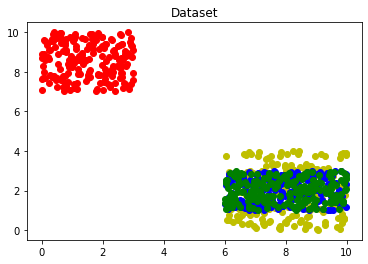

In [7]:
colors = {'سياسة و اقتصاد':'r', 'السن':'g', 'تربية':'b', 'اداب':'y'}

fig, ax = plt.subplots()

for i in range(len(X)):
    ax.scatter(X['teaching'][i], X['economic&stat'][i],color=colors[Y[i]])

ax.set_title('Dataset')
ax.set_xlabel('')
ax.set_ylabel('')

Text(0, 0.5, '')

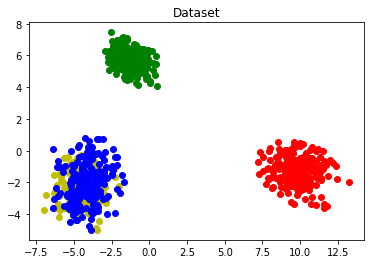

In [8]:
colors = {'سياسة و اقتصاد':'r', 'السن':'g', 'تربية':'b', 'اداب':'y'}

fig, ax = plt.subplots()

for i in range(len(pca_data[0])):
    ax.scatter(pca_data[0][i], pca_data[1][i],color=colors[Y[i]])

ax.set_title('Dataset')
ax.set_xlabel('')
ax.set_ylabel('')

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [10]:
model = GaussianNB()

In [11]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
model.score(x_test, y_test)

0.8958333333333334

In [13]:
y_pred = model.predict(x_test)

In [14]:
model.classes_

array(['اداب', 'السن', 'تربية', 'سياسة و اقتصاد'], dtype='<U14')

In [15]:
confusion_matrix(y_test, y_pred)

array([[49,  0, 11,  0],
       [ 0, 60,  0,  0],
       [14,  0, 46,  0],
       [ 0,  0,  0, 60]])

In [16]:
#prob = model.predict_proba(x_test)

In [17]:
#output = []
#for i in range(len(model.classes_)):
  #output.append([model.classes_[i], prob[0][i]])

In [18]:
#ds = pd.DataFrame(output, columns = ['name', 'prob']) 

In [19]:
#ds.sort_values(by=['prob'],ascending=False)